<a href="https://colab.research.google.com/github/nhaandq/AI_project-FruitDetection/blob/main/Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import pickle
from os import listdir
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.preprocessing.image import  img_to_array
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import SGD

In [2]:
raw_folder = '/content/drive/MyDrive/Fruit/Training_data/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
X = []
y = []
classes = sorted(listdir(raw_folder))
print(classes)

['Banana', 'Lemon', 'Mango', 'Orange', 'Pineapple', 'Potato', 'Starfruit', 'Strawberry', 'Tomato', 'Watermelon']


In [12]:
i=0

for folder in classes:
  print("Folder=",folder)
  for file in listdir(raw_folder + folder):
    print("File=", file)
    X.append(cv.resize(cv.imread(raw_folder+ folder +"/" +file, cv.IMREAD_COLOR),dsize=(150,150)))
    y.append(i)
  i+=1

Folder= Banana
File= banana (125).png
File= banana (148).png
File= banana (162).png
File= banana (160).png
File= banana (152).png
File= banana (174).png
File= banana (121).png
File= banana (139).png
File= banana (119).png
File= banana (129).png
File= banana (17).png
File= banana (127).png
File= banana (4).png
File= banana (15).png
File= banana (171).png
File= banana (145).png
File= banana (133).png
File= banana (14).png
File= banana (150).png
File= banana (135).png
File= banana (134).png
File= banana (5).png
File= banana (13).png
File= banana (1).png
File= banana (141).png
File= banana (10).png
File= banana (18).png
File= banana (116).png
File= banana (132).png
File= banana (118).png
File= banana (157).png
File= banana (123).png
File= banana (138).png
File= banana (159).png
File= banana (166).png
File= banana (112).png
File= banana (144).png
File= banana (114).png
File= banana (173).png
File= banana (147).png
File= banana (142).png
File= banana (111).png
File= banana (113).png
File= ba

In [13]:
X = np.array(X)
y = np.array(y)
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Tạo tệp TrainTest trong GDrive, sau đó lưu dữ liệu X,y và0
file = open('/content/drive/MyDrive/Fruit/TrainTest', 'wb')
pickle.dump((X,y), file)
file.close()

In [14]:
# Load X, y từ file TrainTest
file = open('/content/drive/MyDrive/Fruit/TrainTest', 'rb')
(X, y) = pickle.load(file)
file.close()

print(X.shape)
print(y.shape)
print(classes)

(1564, 150, 150, 3)
(1564, 10)
['Banana', 'Lemon', 'Mango', 'Orange', 'Pineapple', 'Potato', 'Starfruit', 'Strawberry', 'Tomato', 'Watermelon']


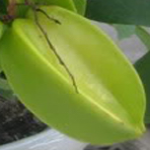

[0 0 0 0 0 0 1 0 0 0]
Starfruit


In [19]:
cv2_imshow(X[1000])
print(y[1000])
print(classes[np.argmax(y[1000])])

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1251, 150, 150, 3)
(1251, 10)
(313, 150, 150, 3)
(313, 10)


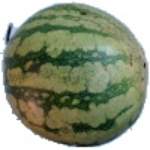

[0 0 0 0 0 0 0 0 0 1]
Watermelon


In [21]:
cv2_imshow(X_train[100])
print(y_train[100])
print(classes[np.argmax(y_train[100])])

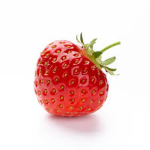

[0 0 0 0 0 0 0 1 0 0]
Strawberry


In [23]:
cv2_imshow(X_test[20])
print(y_test[20])
print(classes[np.argmax(y_test[20])])

In [24]:
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')

In [25]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3) ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [26]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
  rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,
	horizontal_flip=True, brightness_range=[0.2,1.5], fill_mode="nearest")

In [27]:
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [28]:
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(aug.flow(X_train1, y_train, batch_size=64), epochs=10, 
                          validation_data=aug.flow(X_test1,y_test,batch_size=len(X_test1)),
                          callbacks=callbacks_list,verbose = 1)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 1.8944 - accuracy: 0.3365
Epoch 1: val_accuracy improved from -inf to 0.66773, saving model to weights-01-0.67.hdf5
20/20 [==============================] - 29s 1s/step - loss: 1.8944 - accuracy: 0.3365 - val_loss: 1.1572 - val_accuracy: 0.6677
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.9171 - accuracy: 0.7114
Epoch 2: val_accuracy improved from 0.66773 to 0.78914, saving model to weights-02-0.79.hdf5
20/20 [==============================] - 27s 1s/step - loss: 0.9171 - accuracy: 0.7114 - val_loss: 0.7008 - val_accuracy: 0.7891
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.8249
Epoch 3: val_accuracy improved from 0.78914 to 0.85942, saving model to weights-03-0.86.hdf5
20/20 [==============================] - 29s 1s/step - loss: 0.6633 - accuracy: 0.8249 - val_loss: 0.4866 - val_accuracy: 0.8594
Epoch 4/10
20/20 [==============================] - ETA

In [29]:
model.load_weights("weights-09-0.95.hdf5")

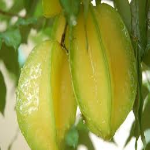

1.283 % Banana
0.0 % Lemon
3.859 % Mango
3.843 % Orange
0.013 % Pineapple
0.0 % Potato
91.001 % Starfruit
0.0 % Strawberry
0.0 % Tomato
0.0 % Watermelon
Result: Starfruit


In [41]:
img = cv.resize(cv.imread('/content/drive/MyDrive/Fruit/Test/khe.jpg', cv.IMREAD_COLOR),dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
print('Result: ' + classes[np.argmax(predict)])

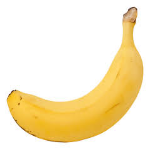

99.985 % Banana
0.0 % Lemon
0.011 % Mango
0.003 % Orange
0.0 % Pineapple
0.0 % Potato
0.0 % Starfruit
0.0 % Strawberry
0.0 % Tomato
0.001 % Watermelon
Result: Banana


In [40]:
img = cv.resize(cv.imread('/content/drive/MyDrive/Fruit/Test/chuoi.jpg', cv.IMREAD_COLOR),dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
predict = predict[0]
j=0
for i in predict:
  print(str(round(100*i,3))+' % '+str(classes[j]))
  j+=1
print('Result: ' + classes[np.argmax(predict)])

In [ ]:
"""
Link dữ liệu gdrive: https://drive.google.com/drive/folders/1OYICMUVCw9LyFmFk0ixywRjMatIOG4hK?usp=sharing
Link github: https://github.com/nhaandq/AI_project-FruitDetection/blob/main/Fruit.ipynb
Link kaggle: https://www.kaggle.com/code/quysnhaan/fruit10detection
"""